In [3]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.discriminant_analysis import StandardScaler



In [5]:
def list_files_in_zip(zip_file_name):
    # Open the zip file
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # List all the contents of the zip file
        file_names = zip_ref.namelist()
    
    return file_names


In [6]:
zip_file_name = 'stocks.zip'

file_names = list_files_in_zip(zip_file_name)
file_names = [name.replace('.csv', '') for name in file_names]



In [7]:
df = pd.DataFrame(file_names)

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2012-06-18,11.64,12.006,11.52,11.89,8.815559,296237,BAK
1,2012-06-19,12.22,12.220,11.90,12.11,8.978674,539191,BAK
2,2012-06-20,12.23,12.530,12.10,12.40,9.193687,578106,BAK
3,2012-06-21,12.57,12.600,11.74,11.77,8.726588,843803,BAK
4,2012-06-22,11.96,12.060,11.69,11.85,8.785902,828184,BAK


In [2]:
df_headlines = pd.read_csv('news_headlines.csv')

In [44]:
df_headlines.columns

Index(['index', 'title', 'date', 'stock'], dtype='object')

In [3]:
df_headlines[['date', 'time']] = df_headlines['date'].str.split(' ', 1, expand=True)


In [6]:
df_headlines['date']  = pd.to_datetime(df_headlines['date'])

In [5]:
df_headlines['date'] = df_headlines['date'].astype(str)

# Drop rows where the date column contains letters
df_headlines = df_headlines[~df_headlines['date'].str.contains('[a-zA-Z]')]

In [7]:
df_headlines.dropna()

,index,title,date,stock,time
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,10:30:00-04:00
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,10:45:00-04:00
2,2.0,71 Biggest Movers From Friday,2020-05-26,A,04:30:00-04:00
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,12:45:00-04:00
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,11:38:00-04:00
...,...,...,...,...,...
1048568,1060928.0,uniQure Announces 36 Weeks of Follow-Up Data f...,2019-07-06,QURE,07:36:00-04:00
1048569,1060929.0,The Daily Biotech Pulse: FDA Approves Karyopha...,2019-07-05,QURE,08:55:00-04:00
1048570,1060930.0,The Week Ahead In Biotech: Pending Clinical Re...,2019-06-29,QURE,08:25:00-04:00
1048571,1060931.0,60 Biggest Movers From Yesterday,2019-06-25,QURE,05:12:00-04:00


In [ ]:
df_headlines

,index,title,date,stock,time
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,10:30:00-04:00
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,10:45:00-04:00
2,2.0,71 Biggest Movers From Friday,2020-05-26,A,04:30:00-04:00
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,12:45:00-04:00
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,11:38:00-04:00
...,...,...,...,...,...
1048568,1060928.0,uniQure Announces 36 Weeks of Follow-Up Data f...,2019-07-06,QURE,07:36:00-04:00
1048569,1060929.0,The Daily Biotech Pulse: FDA Approves Karyopha...,2019-07-05,QURE,08:55:00-04:00
1048570,1060930.0,The Week Ahead In Biotech: Pending Clinical Re...,2019-06-29,QURE,08:25:00-04:00
1048571,1060931.0,60 Biggest Movers From Yesterday,2019-06-25,QURE,05:12:00-04:00


In [8]:
stocks_df = set(df[0])
stocks_df_headlines = set(df_headlines['stock'])

# Find the intersection of the two sets
extract_stock_files = list(stocks_df.intersection(stocks_df_headlines))

In [14]:
len(extract_stock_files)

2564

In [151]:
dataframes = []
target_folder ='extracted_files'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Iterate over the extracted files
        for stock in extract_stock_files:
            file_name = f"{stock}.csv"
            combined_df = pd.DataFrame()
            if file_name in zip_ref.namelist():
                # Extract the file
                zip_ref.extract(file_name,target_folder)
                # print(file_name)
                # Read the CSV file into a DataFrame
                df = pd.read_csv(os.path.join(target_folder, file_name))
                # Append the DataFrame to the list
                df['ticker'] = stock
                dataframes.append((df))
                
        combined_df = pd.concat(dataframes, ignore_index=True)
        combined_df.to_csv('stocks_data.csv', mode='a', header=False, index=False)

In [152]:
combined_df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
13951312,2020-03-05,12.20,12.3500,11.4000,11.54,11.54,103140.0,BAK
13951313,2020-03-06,10.83,11.4400,10.6800,10.83,10.83,152227.0,BAK
13951314,2020-03-09,9.46,10.4600,9.0700,9.11,9.11,312548.0,BAK
13951315,2020-03-10,10.01,10.9999,9.8400,10.74,10.74,256312.0,BAK
13951316,2020-03-11,10.61,10.7350,9.0200,9.21,9.21,187277.0,BAK
13951317,2020-03-12,7.00,7.7000,6.2500,6.99,6.99,293339.0,BAK
13951318,2020-03-13,8.54,8.7000,7.0000,8.36,8.36,308190.0,BAK
13951319,2020-03-16,8.40,8.6500,6.7800,6.83,6.83,343688.0,BAK
13951320,2020-03-17,6.99,7.6200,6.6800,7.01,7.01,180867.0,BAK
13951321,2020-03-18,6.02,6.3800,4.5700,4.79,4.79,255582.0,BAK


In [8]:
stocks_data = pd.read_csv('stocks_data.csv')

In [9]:
len(stocks_data)

13951331

In [10]:
new_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ticker']

# Replace the columns in the DataFrame
stocks_data.columns = new_columns

In [11]:
df_ticker = pd.read_csv('news_data.csv')

In [12]:
stocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2013-03-22,17.570000,17.570000,16.709999,16.809999,16.809999,75200.0,ENTA
1,2013-03-25,17.400000,17.400000,16.799999,16.830000,16.830000,24100.0,ENTA
2,2013-03-26,16.910000,17.313999,16.900000,17.090000,17.090000,27000.0,ENTA
3,2013-03-27,16.950001,17.230000,16.580000,17.090000,17.090000,33900.0,ENTA
4,2013-03-28,16.980000,18.500000,16.920000,18.200001,18.200001,57700.0,ENTA
...,...,...,...,...,...,...,...,...
13951326,2020-03-26,6.640000,8.100000,6.640000,7.810000,7.810000,543221.0,BAK
13951327,2020-03-27,7.810000,7.855000,6.710000,7.060000,7.060000,208643.0,BAK
13951328,2020-03-30,7.110000,7.185000,6.710000,6.910000,6.910000,159131.0,BAK
13951329,2020-03-31,7.200000,7.200000,6.610000,6.640000,6.640000,175378.0,BAK


In [12]:
df_ticker.columns
df_ticker = df_ticker[['Ticker','Industry']]

In [13]:
result_df = pd.merge(stocks_data, df_ticker, left_on='ticker', right_on='Ticker', how='left')


In [20]:
result_df.head()

,Date,Adj Close,Ticker,Industry,Adj Close Diff
40307,1992-11-12,80.022629,BIOL,Medical Devices,NaN
40308,1992-11-13,86.881714,BIOL,Medical Devices,6.859085
40309,1992-11-16,89.168083,BIOL,Medical Devices,2.286369
40310,1992-11-17,89.168083,BIOL,Medical Devices,0.000000
40311,1992-11-18,84.595360,BIOL,Medical Devices,-4.572723


In [14]:
result_df = result_df.dropna()

In [15]:
result_df['Adj Close Diff'] = result_df['Adj Close'] - result_df['Adj Close'].shift(1)

In [16]:
result_df = result_df.drop(columns=['ticker','Open','High','Low','Volume','Close'])

In [13]:
len(pd.unique(result_df['Industry']))

132

In [25]:
multi_ticker_industries = result_df.groupby('Industry')['Ticker'].nunique()
multi_ticker_industries = multi_ticker_industries[multi_ticker_industries > 10].index

In [15]:
multi_ticker_industries

Index(['Asset Management', 'Banks - Regional', 'Biotechnology',
       'Closed-End Fund - Debt', 'Closed-End Fund - Equity', 'Medical Devices',
       'Oil & Gas E&P', 'Semiconductors'],
      dtype='object', name='Industry')

In [19]:
filtered_df = result_df[result_df['Industry'].isin(multi_ticker_industries)]


NameError: name 'multi_ticker_industries' is not defined

In [23]:
filtered_df.head()

,Date,Adj Close,Ticker,Industry,Adj Close Diff
40307,1992-11-12,80.022629,BIOL,Medical Devices,NaN
40308,1992-11-13,86.881714,BIOL,Medical Devices,6.859085
40309,1992-11-16,89.168083,BIOL,Medical Devices,2.286369
40310,1992-11-17,89.168083,BIOL,Medical Devices,0.000000
40311,1992-11-18,84.595360,BIOL,Medical Devices,-4.572723


In [18]:
result_df['Date'] = pd.to_datetime(result_df['Date'])

In [33]:
k = filtered_df[(filtered_df['Industry'] == 'Medical Devices') & (filtered_df['Date'].between('2020-01-01', '2022-01-01'))]

In [35]:
k.head()

,Date,Adj Close,Ticker,Industry,Adj Close Diff
47140,2020-01-02,0.61,BIOL,Medical Devices,0.06
47141,2020-01-03,0.63,BIOL,Medical Devices,0.02
47142,2020-01-06,0.57,BIOL,Medical Devices,-0.06
47143,2020-01-07,0.59,BIOL,Medical Devices,0.02
47144,2020-01-08,0.59,BIOL,Medical Devices,0.00


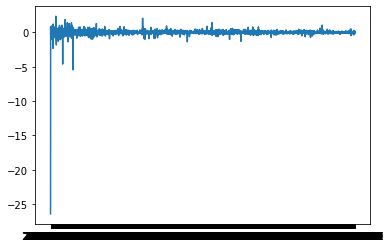

In [33]:
from matplotlib import pyplot as plt

# ticker_df = filtered_df[filtered_df['Ticker'] == 'ARAY']
plt.plot(k['Date'], k['Adj Close Diff'], label='ARAY')
plt.plot(k['Date'], k['Adj Close Diff'], label='ARAY')

In [32]:
pd.unique(medical_df["Ticker"])

array(['BIOL', 'ARAY', 'PACB', 'AXDX', 'CNMD', 'AXGN', 'CERS', 'BIO',
       'DXCM', 'INGN', 'IART', 'ELMD', 'NSPR'], dtype=object)

In [28]:
medical_df = filtered_df[filtered_df['Industry']=='Medical Devices']


In [17]:
df_headlines['date'] = pd.to_datetime(df_headlines['date'], errors='coerce')
result_df['Date'] = pd.to_datetime(result_df['Date'])

df_headlines = df_headlines.dropna(subset=['date'])


In [36]:
result_df.columns

Index(['Date', 'Adj Close', 'Ticker', 'Industry', 'Adj Close Diff'], dtype='object')

In [18]:
final_df = pd.merge(df_headlines, result_df, left_on=['stock','date'], right_on=['Ticker','Date'], how='left')

In [19]:
final_df = final_df[final_df['Ticker'].notna()]

In [20]:
final_df = final_df[final_df['stock'] == final_df['Ticker']]


In [31]:
final_df.head()

,index,title,date,stock,time,Date,Adj Close,Ticker,Industry,Adj Close Diff
29,29.0,Shares of several healthcare companies are tra...,2020-04-01,A,09:20:00-04:00,2020-04-01,68.919998,A,Diagnostics & Research,-2.700005
30,30.0,Int'l. Air Transport Authority Chief Economist...,2020-03-31,A,08:55:00-04:00,2020-03-31,71.620003,A,Diagnostics & Research,-1.049995
31,31.0,Wells Fargo Maintains Overweight on Agilent Te...,2020-03-30,A,10:30:00-04:00,2020-03-30,72.669998,A,Diagnostics & Research,1.939995
32,32.0,Shares of several technology companies are tra...,2020-03-30,A,10:23:00-04:00,2020-03-30,72.669998,A,Diagnostics & Research,1.939995
33,33.0,Shares of several healthcare companies are tra...,2020-03-27,A,10:58:00-04:00,2020-03-27,70.730003,A,Diagnostics & Research,-2.802864


In [21]:
final_df=final_df.drop(columns=['time','Ticker','Date','index'])

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound']

In [23]:
final_df['sentiment'] = final_df['title'].apply(f)

In [5]:
final_df['stock'].unique()

<bound method Series.unique of 0            A
1            A
2            A
3            A
4            A
          ... 
222073    PZZA
222074    PZZA
222075    PZZA
222076    PZZA
222077    PZZA
Name: stock, Length: 222078, dtype: object>

In [26]:
final_df.to_csv('training_data')

In [83]:
df_A = final_df[final_df['stock']=='PZZA']

In [84]:
df_A = df_A[400:]


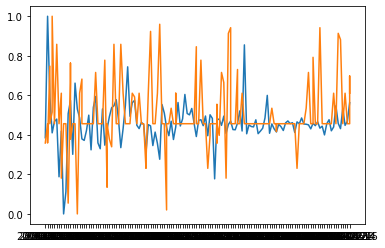

In [88]:
# ticker_df = filtered_df[filtered_df['Ticker'] == 'ARAY']
plt.plot(df_A['date'], df_A['Adj Close Diff'], label='A')
plt.plot(df_A['date'], df_A['sentiment'], label='A')


In [4]:
final_df = pd.read_csv('training_data')

In [4]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [38]:
df_A['Adj Close Diff'] = scaler.fit_transform(df_A['Adj Close Diff'].values.reshape(-1, 1))


NameError: name 'df_A' is not defined

In [6]:
df_A['sentiment'] = scaler.fit_transform(df_A['sentiment'].values.reshape(-1, 1))

NameError: name 'df_A' is not defined

In [91]:
final_df.head()

,title,date,stock,Adj Close,Industry,Adj Close Diff,sentiment
29,Shares of several healthcare companies are tra...,2020-04-01,A,68.919998,Diagnostics & Research,NaN,-0.2732
30,Int'l. Air Transport Authority Chief Economist...,2020-03-31,A,71.620003,Diagnostics & Research,2.700005,0.0516
31,Wells Fargo Maintains Overweight on Agilent Te...,2020-03-30,A,72.669998,Diagnostics & Research,1.049995,-0.2500
32,Shares of several technology companies are tra...,2020-03-30,A,72.669998,Diagnostics & Research,0.000000,0.2960
33,Shares of several healthcare companies are tra...,2020-03-27,A,70.730003,Diagnostics & Research,-1.939995,0.8271


In [90]:
final_df['Adj Close Diff'] = final_df['Adj Close'] - final_df['Adj Close'].shift(1)

In [7]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['Date_ordinal'] = final_df['date'].apply(lambda x: x.toordinal())

In [10]:
final_df.head()

,Unnamed: 0,title,date,stock,Adj Close,Industry,Adj Close Diff,sentiment
0,29,Shares of several healthcare companies are tra...,2020-04-01,A,68.919998,Diagnostics & Research,-2.700005,-0.2732
1,30,Int'l. Air Transport Authority Chief Economist...,2020-03-31,A,71.620003,Diagnostics & Research,-1.049995,0.0516
2,31,Wells Fargo Maintains Overweight on Agilent Te...,2020-03-30,A,72.669998,Diagnostics & Research,1.939995,-0.2500
3,32,Shares of several technology companies are tra...,2020-03-30,A,72.669998,Diagnostics & Research,1.939995,0.2960
4,33,Shares of several healthcare companies are tra...,2020-03-27,A,70.730003,Diagnostics & Research,-2.802864,0.8271


Prediction models:

In [5]:
from sklearn.model_selection import train_test_split


# X = final_df[['sentiment', 'Adj Close Diff', 'Date_ordinal']]
y = final_df['Adj Close']

X = final_df.drop(columns=['Adj Close','stock','title','date','Industry'])
# y = final_df['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 206627.3207144433


In [9]:
# Calculate and print additional metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 12.832793340548795
Root Mean Squared Error: 454.56277972843674
R-squared: 0.9004940716286397


In [86]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.9449134147140993


In [49]:
max(filtered_df['Adj Close'])


153300.0

1697825.2186500991

LSTM Model:

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

NameError: name 'X_train_scaled' is not defined

In [91]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(final_df[features])
scaled_target = scaler.fit_transform(final_df[target].values.reshape(-1, 1))



In [92]:
# Create sequences of data for LSTM
def create_sequences(features, target, time_step=1):
    X, y = [], []
    for i in range(len(features) - time_step - 1):
        a = features[i:(i + time_step), :]
        X.append(a)
        y.append(target[i + time_step])
    return np.array(X), np.array(y)

time_step = 3
X, y = create_sequences(scaled_features, scaled_target, time_step)

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [96]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, train_predict)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
train_r2 = r2_score(y_train, train_predict)

test_mae = mean_absolute_error(y_test, test_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
test_r2 = r2_score(y_test, test_predict)

print(f'Train Mean Absolute Error: {train_mae}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Train R-squared: {train_r2}')


1388/1388 [==============================] - 4s 3ms/step
Train Mean Absolute Error: 4.295506599457339
Train Root Mean Squared Error: 253.82498315644378
Train R-squared: -5.495104917763172e-07


In [6]:
df_encoded = pd.get_dummies(final_df, columns=['Industry'], prefix='Industry')

In [9]:
df_encoded = pd.get_dummies(final_df, columns=['stock','Industry'])

In [10]:
df_encoded.head()

,Unnamed: 0,title,date,Adj Close,Adj Close Diff,sentiment,stock_A,stock_AAMC,stock_AAME,stock_AAN,...,Industry_Tobacco,Industry_Tools & Accessories,Industry_Travel Services,Industry_Trucking,Industry_Uranium,Industry_Utilities - Diversified,Industry_Utilities - Regulated Electric,Industry_Utilities - Regulated Gas,Industry_Utilities - Regulated Water,Industry_Utilities - Renewable
0,29,Shares of several healthcare companies are tra...,2020-04-01,68.919998,-2.700005,-0.2732,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,Int'l. Air Transport Authority Chief Economist...,2020-03-31,71.620003,-1.049995,0.0516,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,Wells Fargo Maintains Overweight on Agilent Te...,2020-03-30,72.669998,1.939995,-0.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,Shares of several technology companies are tra...,2020-03-30,72.669998,1.939995,0.2960,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,Shares of several healthcare companies are tra...,2020-03-27,70.730003,-2.802864,0.8271,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df_encoded.drop(columns=['Adj Close','title','date','Unnamed: 0'])
y = df_encoded['Adj Close']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
model = RandomForestRegressor(random_state=42)

# Define a more focused parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 201),  # Reduce upper limit
    'max_depth': randint(10, 21),       # Reduce upper limit
    'min_samples_split': randint(2, 6),  # Reduce upper limit
    'min_samples_leaf': randint(1, 4)    # Reduce upper limit
}

# Initialize RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=30,               # Reduce number of iterations
    cv=2,                    # Reduce number of cross-validation folds
    n_jobs=-1,               # Use all available cores
    random_state=42, 
    verbose=2
)